In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
df = pd.read_csv('_dataset/data.csv', names=['x', 'y'])
df.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


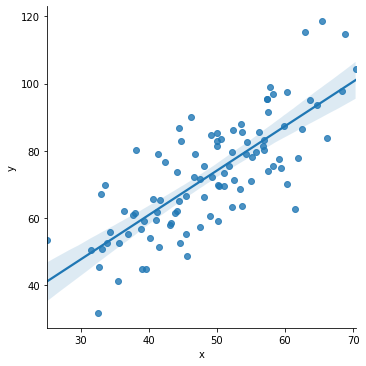

In [26]:
sns.lmplot(x ="x", y ="y", data = df)

In [27]:
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.6154965855322123


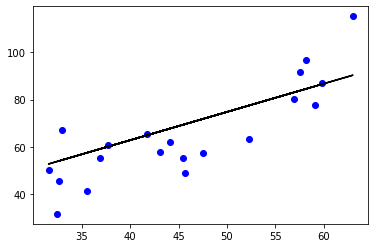

In [28]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 10.079985943143063
MSE: 153.20927168160281
RMSE: 12.377773292543486


In [30]:
from sklearn.model_selection import cross_val_score

c = cross_val_score(regr,X,y, scoring='neg_root_mean_squared_error', cv = 5)
me = np.mean(c)
me

-10.750800703219392